# Import Libraries and DataSet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [194]:
filename = 'C:\Users\\tanasity\\Desktop\\train.csv'

# Start EDA & make the necessary transformations

In [195]:
df = pd.read_csv(filename)
df.shape

(1460, 81)

In [196]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


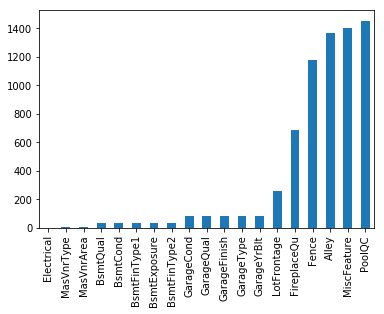

In [197]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

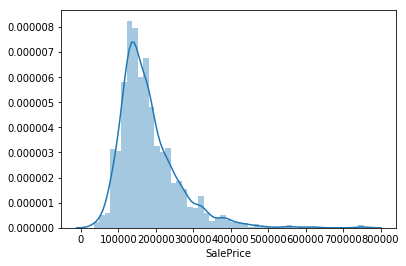

In [198]:
sns.distplot(df.SalePrice)

In [4]:
#encoding existing pool
mapping = {np.nan:0, 'Ex':1, 'Fa':1,
          'Gd':1}

df['Pool'] = df.PoolQC.map(mapping)

In [5]:
#deleting the features PoolQC and PoolArea
df.drop(['PoolQC'], axis=1, inplace=True)
df.drop(['PoolArea'], axis=1, inplace=True)

In [6]:
#Assumption: We drop "Alley" feature as it has only 91 values 
df.drop(['Alley'], axis=1, inplace=True)

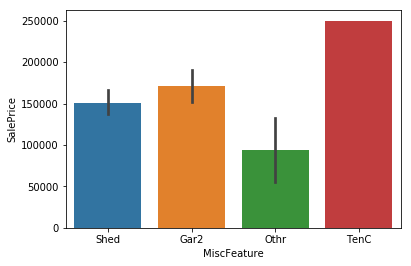

In [7]:
#barplot of MiscFeature in combination with SalePrice
sns.barplot(x=df.MiscFeature, y=df.SalePrice,data=df)

In [8]:
#encoding MiscFeature
mapping1 = {'Shed':1, 'Gar2':1, 'Othr':1, 'TenC':1, np.nan:0 }

df['Extra_MiscFeature'] = df.MiscFeature.map(mapping1)

In [9]:
#deleting the features MiscFeature
df.drop(['MiscFeature'], axis=1, inplace=True)

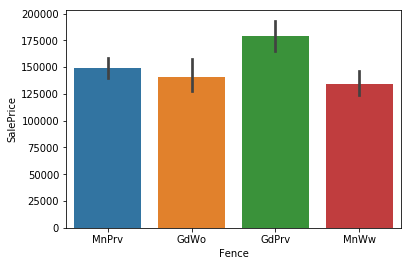

In [10]:
#barplot of Fence in combination with SalePrice
sns.barplot(x=df.Fence, y=df.SalePrice,data=df)

In [11]:
#encoding Fence
mapping2 = {'MnPrv':1, 'GdWo':1, 'GdPrv':1, 'MnWw':1, np.nan:0 }

df['Exist_Fence'] = df.Fence.map(mapping2)

In [12]:
#deleting the features Fence
df.drop(['Fence'], axis=1, inplace=True)

In [13]:
#droping the feature Id
df.drop(['Id'], axis=1, inplace=True)

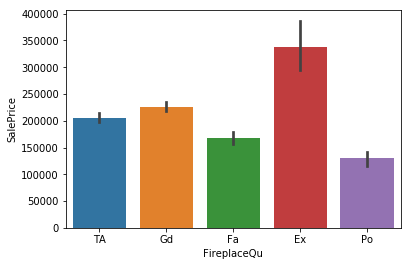

In [14]:
#barplot of FireplaceQu in combination with SalePrice
sns.barplot(x=df.FireplaceQu, y=df.SalePrice,data=df)

In [15]:
#manipulation FireplaceQu feature
mean_TA = df['SalePrice'][df['FireplaceQu']=='TA'].sum()/float(len(df['SalePrice'][df['FireplaceQu']=='TA']))
mean_Gd = df['SalePrice'][df['FireplaceQu']=='Gd'].sum()/float(len(df['SalePrice'][df['FireplaceQu']=='Gd']))
mean_Fa = df['SalePrice'][df['FireplaceQu']=='Fa'].sum()/float(len(df['SalePrice'][df['FireplaceQu']=='Fa']))
mean_Ex = df['SalePrice'][df['FireplaceQu']=='Ex'].sum()/float(len(df['SalePrice'][df['FireplaceQu']=='Ex']))
mean_Po = df['SalePrice'][df['FireplaceQu']=='Po'].sum()/float(len(df['SalePrice'][df['FireplaceQu']=='Po']))
mean_all = (mean_TA+mean_Gd+mean_Fa+mean_Ex+mean_Po)/5
print(mean_all)

213370.007891


In [16]:
#I will make binary the feature of fireplacqu 
mapping3 = {'TA':1, 'Gd':1, 'Fa':1, 'Ex':1, 'Po':1, np.nan:0}

df['Fireplace'] = df.FireplaceQu.map(mapping3)

In [17]:
#deleting the features FireplaceQu
df.drop(['FireplaceQu'], axis=1, inplace=True)

In [18]:
#filling the missing value of Electrical feature
df['Electrical'][1379] = 'FuseA'
#cheching if the missing value filled
print(df['Electrical'][1379])

FuseA


C:\Users\tanasity\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
##encoding Neighborhood
#low=0 med=1 high=2
mapping4={'Blmngtn':1, 'Blueste':0, 'BrDale':0, 'BrkSide':0,'ClearCr':1,
       'CollgCr':1,  'Crawfor':1, 'Edwards':0, 'Gilbert':1,  
       'IDOTRR':0,  'MeadowV':0,   'Mitchel':0, 'NAmes':0,'NoRidge':2,  
       'NPkVill':0,   'NridgHt':2  ,'NWAmes':0,'OldTown':0,'SWISU':0,'Sawyer':0,
       'SawyerW':1, 'Somerst':0, 'StoneBr':2, 'Timber':1,
       'Veenker':1}
df['Neighborhood_new']=df['Neighborhood'].map(mapping4)

In [20]:
#delete "Neighborhood" feature
df.drop(['Neighborhood'], axis=1, inplace=True)

In [21]:
max_year = df['YearBuilt'].max() # Max year is 2010
treshold = max_year-50 # houses before 1960 consider as old (50y)

# Create new column with nan values to categorize old and new houses
df['Years'] = np.nan

df.loc[df['YearBuilt'] > treshold, 'Years'] = 1 # new houses
df.loc[df['YearBuilt'] <= treshold, 'Years'] = 0 # old houses

# Create new column with nan values to deal with reconstruction
df['Reconstruction'] = np.nan

# Find old houses and no reconstructed
a = df['Years']==0 # old
b = df['YearRemodAdd']==df['YearBuilt'] # no_recon

# Fill with 0 the houses that are old and no reconstructed
df.loc[a & b, 'Reconstruction'] = 0

# Fill the rest NaN values with 1
# Cases: Old & reconstructed, New & reconstructed, New & no reconstructed
df['Reconstruction'].fillna(1,inplace=True)

df.drop(['YearBuilt', 'YearRemodAdd'],axis=1,inplace=True)

# Sum houses' m2, append each value in a new column & check correlation

In [23]:
#create a new column for total m2
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF']


In [24]:
df[['TotalSF','SalePrice']].corr()

,TotalSF,SalePrice
TotalSF,1.000000,0.716883
SalePrice,0.716883,1.000000


In [27]:
#deleting the features 1stFlrSF and 2ndFlrSF
df.drop(['1stFlrSF'], axis=1, inplace=True)
df.drop(['2ndFlrSF'], axis=1, inplace=True)

# Root Square Logarithmic Error(RMSLE) - 1st try

In [28]:
#calculate the Root Square Logarithmic Error(RMSLE)
# def rmsle(y_true, y_pred):
#     assert len(y_true) == len(y_pred)
#     terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y_true[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
#     return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    terms_to_sum = [(math.log(abs(y_pred[i] + 1)) - math.log(abs(y_true[i] + 1))) ** 2.0 for i,_ in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y_true))) ** 0.5

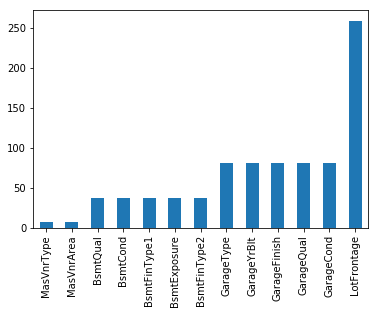

In [29]:
#plot categorical feature whith NaN value
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [159]:
#find the nan values of df
nulls = pd.DataFrame(df2.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
# nulls

In [30]:
#find the correlation between saleprice and all numeric features
numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
# a = corr['SalePrice']

print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

(SalePrice           1.000000
OverallQual         0.790982
TotalSF             0.716883
GrLivArea           0.708624
GarageCars          0.640409
Neighborhood_new    0.638326
GarageArea          0.623431
TotalBsmtSF         0.613581
FullBath            0.560664
TotRmsAbvGrd        0.533723
Name: SalePrice, dtype: float64, '\n')
BsmtHalfBath        -0.016844
MiscVal             -0.021190
LowQualFinSF        -0.025606
YrSold              -0.028923
Extra_MiscFeature   -0.072298
OverallCond         -0.077856
MSSubClass          -0.084284
EnclosedPorch       -0.128578
KitchenAbvGr        -0.135907
Exist_Fence         -0.172184
Name: SalePrice, dtype: float64


In [35]:
# df.info()

In [36]:
df[['LotFrontage','SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


In [37]:
#deleting the features LotFrontage
df.drop(['LotFrontage'], axis=1, inplace=True)

In [38]:
df[['GarageYrBlt','SalePrice']].corr()

,GarageYrBlt,SalePrice
GarageYrBlt,1.000000,0.486362
SalePrice,0.486362,1.000000


In [39]:
#deleting the features GarageYrBlt
df.drop(['GarageYrBlt'], axis=1, inplace=True)

In [40]:
df[['MasVnrArea','SalePrice']].corr()

,MasVnrArea,SalePrice
MasVnrArea,1.000000,0.477493
SalePrice,0.477493,1.000000


In [41]:
#deleting the features MasVnrArea
df.drop(['MasVnrArea'], axis=1, inplace=True)

# Convert Categorical to Numerical with "get_dummies"

In [42]:
#convert the rest categorical features to numeric via get_dummies
df2 = pd.get_dummies(df)
df2.shape

(1460, 246)

In [162]:
#dropping LotFrontage,GarageYrBlt,MasVnrArea--first try
# df2.drop(['LotFrontage'], axis=1, inplace=True)
# df2.drop(['GarageYrBlt'], axis=1, inplace=True)
# df2.drop(['MasVnrArea'], axis=1, inplace=True)

In [43]:
#disunion of dataset 
X = df2.drop(['SalePrice'], axis=1).as_matrix()
y = df2.SalePrice.as_matrix()

# Linear Regression

In [44]:
X_train, X_test,y_train, y_test = train_test_split(X , y,test_size=0.25)

In [45]:
print(X_train.shape, y_train.shape)


((1095L, 245L), (1095L,))


In [46]:
print(X_test.shape,y_test.shape)

((365L, 245L), (365L,))


In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
new_price = lr.predict(X_test)

In [49]:
print(y_test.shape,new_price.shape)

((365L,), (365L,))


In [50]:
print(rmsle(y_test, new_price))

0.24379237664


# Support Vector Machine

In [51]:
from sklearn.svm import SVR

In [52]:
svm = SVR()

In [53]:
svm.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [54]:
pred1 = svm.predict(X_test)
pred1.shape

(365L,)

In [55]:
print(rmsle(y_test, pred1))

0.380126417565


# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
dtr = DecisionTreeRegressor()

In [58]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [59]:
pred2 = dtr.predict(X_test)
pred2.shape

(365L,)

In [60]:
print(rmsle(y_test, pred2))

0.187069729882


# Bayesian Ridge

In [61]:
from sklearn import linear_model

In [62]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [63]:
pred3 = reg.predict(X_test)
pred3.shape

(365L,)

In [64]:
print(rmsle(y_test, pred3))

0.213683959833


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
MSSubClass           1460 non-null int64
MSZoning             1460 non-null object
LotFrontage          1201 non-null float64
LotArea              1460 non-null int64
Street               1460 non-null object
LotShape             1460 non-null object
LandContour          1460 non-null object
Utilities            1460 non-null object
LotConfig            1460 non-null object
LandSlope            1460 non-null object
Condition1           1460 non-null object
Condition2           1460 non-null object
BldgType             1460 non-null object
HouseStyle           1460 non-null object
OverallQual          1460 non-null int64
OverallCond          1460 non-null int64
RoofStyle            1460 non-null object
RoofMatl             1460 non-null object
Exterior1st          1460 non-null object
Exterior2nd          1460 non-null object
MasVnrType           1452 non-null object
MasVnrArea    

In [96]:
#find the correlation between saleprice and all numeric features
# numeric_features = df2.select_dtypes(include=[np.number])
# corr = numeric_features.corr()

# print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
# print (corr['SalePrice'].sort_values(ascending=False)[-250:-150])

In [97]:
# from sklearn.linear_model import Lasso

# lass = Lasso(alpha=0.01)  # alpha determines the strength of the regularization
#                           # the higer the value, the more coefficients will be zero
# lass.fit(X_train, y_train)
# print('\nLasso regression coefficients:\n', lass.coef_)

# Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf = RandomForestRegressor()

In [67]:
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
pred5 = rf.predict(X_test)
pred5.shape

(365L,)

In [69]:
print(rmsle(y_test, pred5))

0.146054784416


# Grid Search CV

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
# param_grid = {'n_estimators': [3, 5, 10, 50],
#              'criterion': ['mse', 'mae'],
#              'max_depth': [None, 10, 30],
#              'min_samples_split': [2, 3]}

# estimator = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
# estimator.fit(X_train, y_train)
# pred6 = estimator.predict(X_test)
# rmsle(y_test, pred6)

0.1581591074349439

# Drop features based on their correlation with Sale Price

In [70]:
numeric_features = df2.select_dtypes(include=[np.number])
corr = numeric_features.corr()
a = corr['SalePrice']
count=0
for i in a.keys():
    if (np.any(a[i]<0.5) and np.any(a[i]>-0.5)):
        df2.drop(i, axis=1, inplace=True)
#         count = count +1
#         print(i,count)
    

In [71]:
df2.shape

(1460, 14)

In [74]:
# df2.info()
numeric_features = df2.select_dtypes(include=[np.number])
corr = numeric_features.corr()
corr['SalePrice']

OverallQual         0.790982
TotalBsmtSF         0.613581
GrLivArea           0.708624
FullBath            0.560664
TotRmsAbvGrd        0.533723
GarageCars          0.640409
GarageArea          0.623431
SalePrice           1.000000
Neighborhood_new    0.638326
TotalSF             0.716883
ExterQual_TA       -0.589044
BsmtQual_Ex         0.553105
KitchenQual_Ex      0.504094
KitchenQual_TA     -0.519298
Name: SalePrice, dtype: float64

In [192]:
# numeric_features = df2.select_dtypes(include=[np.number])
# corr = numeric_features.corr()
# a = corr['SalePrice']
# a.keys()

Index([u'MSSubClass', u'LotArea', u'OverallQual', u'OverallCond',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF',
       ...
       u'SaleType_ConLw', u'SaleType_New', u'SaleType_Oth', u'SaleType_WD',
       u'SaleCondition_Abnorml', u'SaleCondition_AdjLand',
       u'SaleCondition_Alloca', u'SaleCondition_Family',
       u'SaleCondition_Normal', u'SaleCondition_Partial'],
      dtype='object', length=247)

In [75]:
X = df2.drop(['SalePrice'], axis=1).as_matrix()
y = df2.SalePrice.as_matrix()

# Linear Regression - 2nd try

In [171]:
X_train, X_test,y_train, y_test = train_test_split(X , y,test_size=0.25)

In [172]:
print(X_train.shape, y_train.shape)

((1095L, 13L), (1095L,))


In [173]:
print(X_test.shape,y_test.shape)

((365L, 13L), (365L,))


In [174]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [175]:
new_price = lr.predict(X_test)

In [176]:
z_LinearRegression = rmsle(y_test, new_price)

In [177]:
print(rmsle(y_test, new_price))

0.214208158355


# Support Vector Machine - 2nd try

In [82]:
svm = SVR()

In [83]:
svm.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [84]:
pred1 = svm.predict(X_test)

In [85]:
print(rmsle(y_test, pred1))

0.395504800644


In [86]:
dtr = DecisionTreeRegressor()

# Decision Tree - 2nd try

In [167]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [168]:
pred1 = dtr.predict(X_test)

In [169]:
d_DecisionTreeRegressor = rmsle(y_test, pred1)

In [170]:
print(rmsle(y_test, pred1))

0.244332461167


# Bayesian Ridge - 2nd try

In [90]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [91]:
pred2 = reg.predict(X_test)

In [92]:
print(rmsle(y_test, pred2))

0.217946066023


# Lasso - 1st trial

In [93]:
from sklearn.linear_model import Lasso

lass = Lasso(alpha=0.01)  # alpha determines the strength of the regularization
                          # the higer the value, the more coefficients will be zero
lass.fit(X_train, y_train)
print('\nLasso regression coefficients:\n', lass.coef_)

('\nLasso regression coefficients:\n', array([ 1.36409959e+04,  1.87157092e+01,  1.23873895e+01,  5.13631510e+02,
       -2.01301665e+03,  1.22545176e+04,  8.77196237e+00,  1.85332520e+04,
        3.86087155e+01, -3.11230805e+02,  3.69046880e+04,  3.10801611e+04,
       -8.83850316e+03]))


C:\Users\tanasity\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Random Forest

In [94]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [95]:
pred3 = rf.predict(X_test)

In [96]:
print(rmsle(y_test, pred3))

0.167960132779


In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
OverallQual         1460 non-null int64
TotalBsmtSF         1460 non-null int64
GrLivArea           1460 non-null int64
FullBath            1460 non-null int64
TotRmsAbvGrd        1460 non-null int64
GarageCars          1460 non-null int64
GarageArea          1460 non-null int64
SalePrice           1460 non-null int64
Neighborhood_new    1460 non-null int64
TotalSF             1460 non-null int64
ExterQual_TA        1460 non-null uint8
BsmtQual_Ex         1460 non-null uint8
KitchenQual_Ex      1460 non-null uint8
KitchenQual_TA      1460 non-null uint8
dtypes: int64(10), uint8(4)
memory usage: 119.8 KB


# Import Pipeline, Starndard Scaler, Grid Search CV

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [100]:
scaler = StandardScaler() 

In [108]:
y_train = y_train.astype('float64')
X_train = X_train.astype('float64')

In [106]:
X_train.dtype

dtype('float64')

In [110]:
svm.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [166]:
# pipe = Pipeline([('standardizer', scaler), ('regressor', knn)])
# pipe.fit(X_train, y_train)
# preds = pipe.predict(X_test)

pipe = Pipeline([('standardizer', scaler), ('regressor', svm)])

grid = [{'regressor__C': [500, 1000, 2000, 10000], 'regressor__kernel': ['linear','sigmoid']},
        {'regressor__epsilon': [0.1, 0.15],  'regressor__gamma': ['auto', 0.0001]}]

clf = GridSearchCV(pipe, grid, cv=5)
clf.fit(X_train, y_train)

pred7 = clf.predict(X_test)
c_svm = rmsle(y_test, pred7)
print(rmsle(y_test, pred7))

# C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
#     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False
# print('Best accuracy: {:.2f}%'.format(accuracy_score(test_labels, clf.predict(test))*100))
# print(clf.best_estimator_)  # print the best configuration

0.177572440264


In [112]:
print(clf.best_estimator_)

Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])


In [114]:
from scipy.stats import randint as sp_randint

In [165]:
pipe = Pipeline([('standardizer', scaler), ('regressor', rf)])



# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#            oob_score=False, random_state=None, verbose=0, warm_start=False)

param_grid = {'regressor__max_depth': [None,3],
              'regressor__max_features': [1,2],
              'regressor__min_samples_split': [2,3 ],
              'regressor__min_samples_leaf': [1,2 ],
              'regressor__bootstrap': [False],
              'regressor__criterion': ['mae'],
             'regressor__n_estimators': [23,25]}

clf = GridSearchCV(pipe, param_grid,cv=5)
clf.fit(X_train, y_train)

pred8 = clf.predict(X_test)
b_RandomForestRegressor = rmsle(y_test, pred8)
print(rmsle(y_test, pred8))
# print(clf.best_estimator_)

0.172484796667


In [156]:
print(clf.best_estimator_)

Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])


In [162]:
pipe = Pipeline([('standardizer', scaler), ('regressor', reg)])

# BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
#        fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
#        normalize=False, tol=0.001, verbose=False)





param_grid = {'regressor__alpha_1': [1e-08],
              'regressor__alpha_2': [1e-06],
              'regressor__lambda_1': [1e-05],
              'regressor__lambda_2': [1e-05],
              'regressor__verbose': [True, False]}

clf = GridSearchCV(pipe, param_grid,cv=5)
clf.fit(X_train, y_train)
a_BayesianRidge = rmsle(y_test, pred9)
pred9 = clf.predict(X_test)
print(a)
# print(clf.best_estimator_)

Convergence after  8  iterations
Convergence after  8  iterations
Convergence after  8  iterations
Convergence after  9  iterations
Convergence after  10  iterations
Convergence after  8  iterations
0.20101800793


In [132]:
print(clf.best_estimator_)

Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', BayesianRidge(alpha_1=1e-08, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-05, lambda_2=1e-05, n_iter=300,
       normalize=False, tol=0.001, verbose=False))])


# Barplot RMSLE

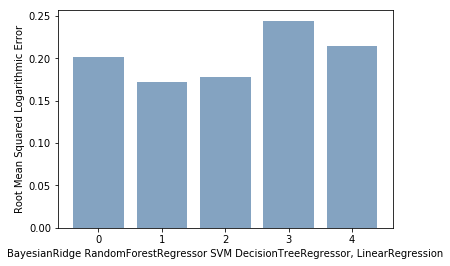

In [193]:
ww = [a_BayesianRidge, b_RandomForestRegressor, c_svm, d_DecisionTreeRegressor,z_LinearRegression]
plt.bar(range(5), ww,color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('BayesianRidge RandomForestRegressor SVM DecisionTreeRegressor, LinearRegression')
plt.ylabel('Root Mean Squared Logarithmic Error')
plt.show()